In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as graph



In [3]:
games = pd.read_csv("ign.csv")

In [4]:
games.head()


,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [5]:
games.drop(['Unnamed: 0','url','editors_choice'],axis=1,inplace=True) 
games.drop(games.index[516],inplace=True) 


In [6]:
games.head()

,score_phrase,title,platform,score,genre,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,2012,9,12
2,Great,Splice: Tree of Life,iPad,8.5,Puzzle,2012,9,12
3,Great,NHL 13,Xbox 360,8.5,Sports,2012,9,11
4,Great,NHL 13,PlayStation 3,8.5,Sports,2012,9,11


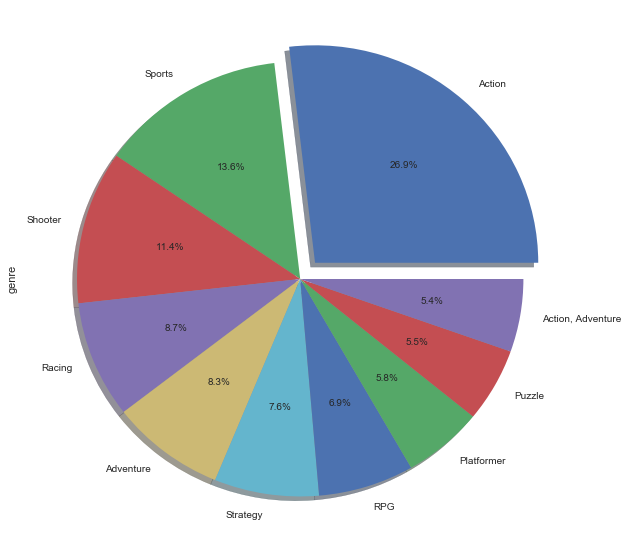

In [6]:
#plot the top 10 Genres using PIE Chart
games['genre'].value_counts()[:10].plot(kind='pie',fontsize=10,figsize=(10,10),autopct='%0.1f%%',shadow=True,explode=[0.1,0,0,0,0,0,0,0,0,0])
plt.show()



In [7]:
# plotting Top10 Platforms using Pie Chart
Top10 = games['platform'].value_counts()
Top10 = Top10[:10]
Top10


PC               3370
PlayStation 2    1686
Xbox 360         1630
Wii              1366
PlayStation 3    1356
Nintendo DS      1045
PlayStation       952
Wireless          910
iPhone            842
Xbox              821
Name: platform, dtype: int64

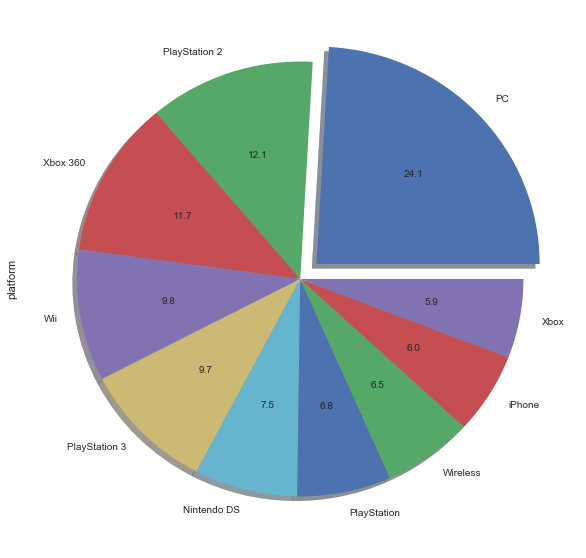

In [8]:
Top10.plot.pie(autopct='%0.1f',fontsize=10,figsize=(10,10),legend=False, shadow=True,explode=[0.1,0,0,0,0,0,0,0,0,0])
plt.show()

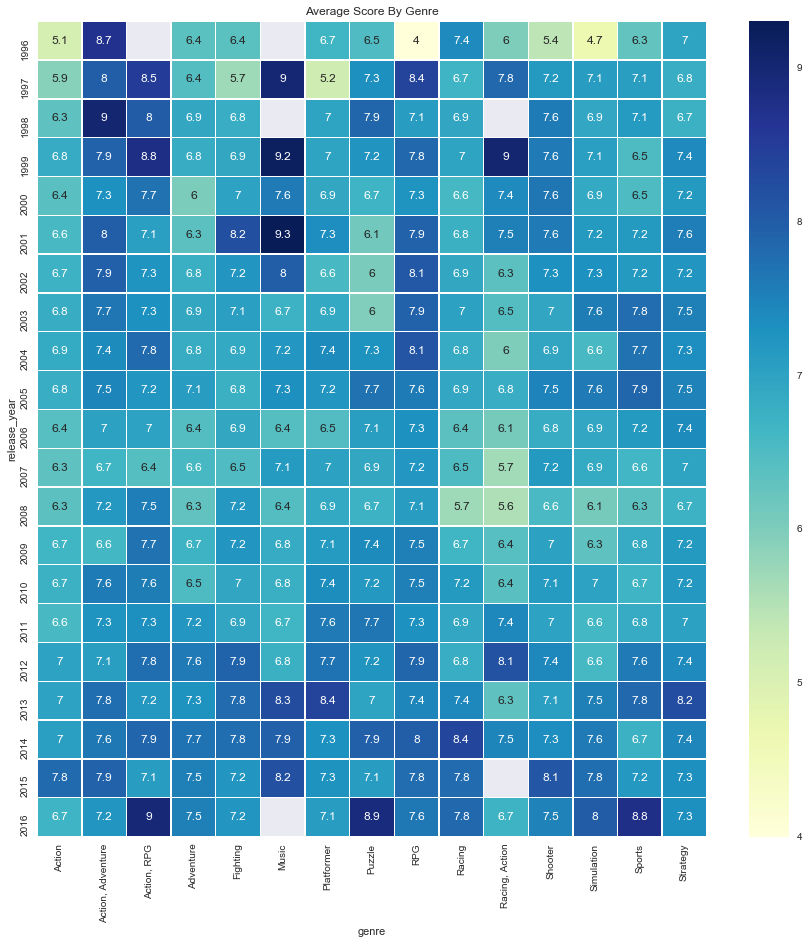

In [10]:
#Heat map to show average score by Genere
plt.subplots(figsize=(15,15))
max_genres=games.groupby('genre')['genre'].count()#grouped based on genre
max_genres=max_genres[max_genres.values>200]#taken into account only generes having  value greater than 200
max_genres.sort_values(ascending=True,inplace=True)
mean_games=games[games['genre'].isin(max_genres.index)]
average=mean_games.groupby(['release_year','genre'])['score'].mean().reset_index()
average=average.pivot('release_year','genre','score')
sns.heatmap(average,annot=True,cmap="YlGnBu",linewidths=0.4)
plt.title('Average Score By Genre')
plt.show()

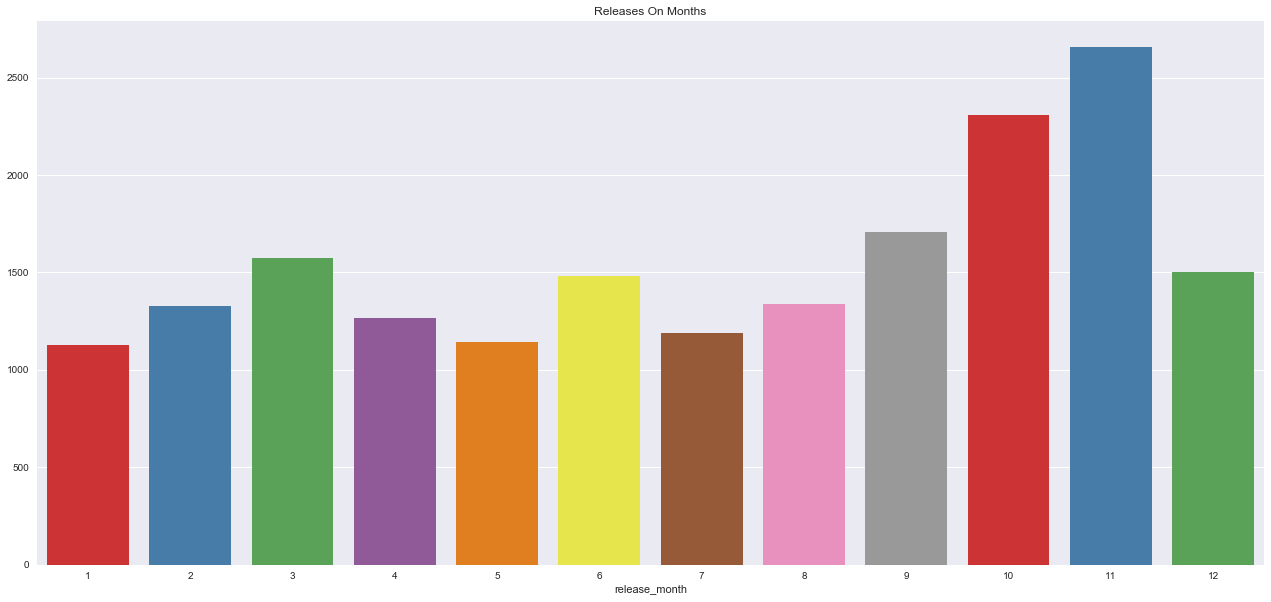

In [10]:
#Releases based on Months
fig,ax=plt.subplots(figsize=(22,10))
sns.countplot(games['release_month'],palette='Set1').set_title('Releases On Months')
plt.ylabel('')
plt.show()

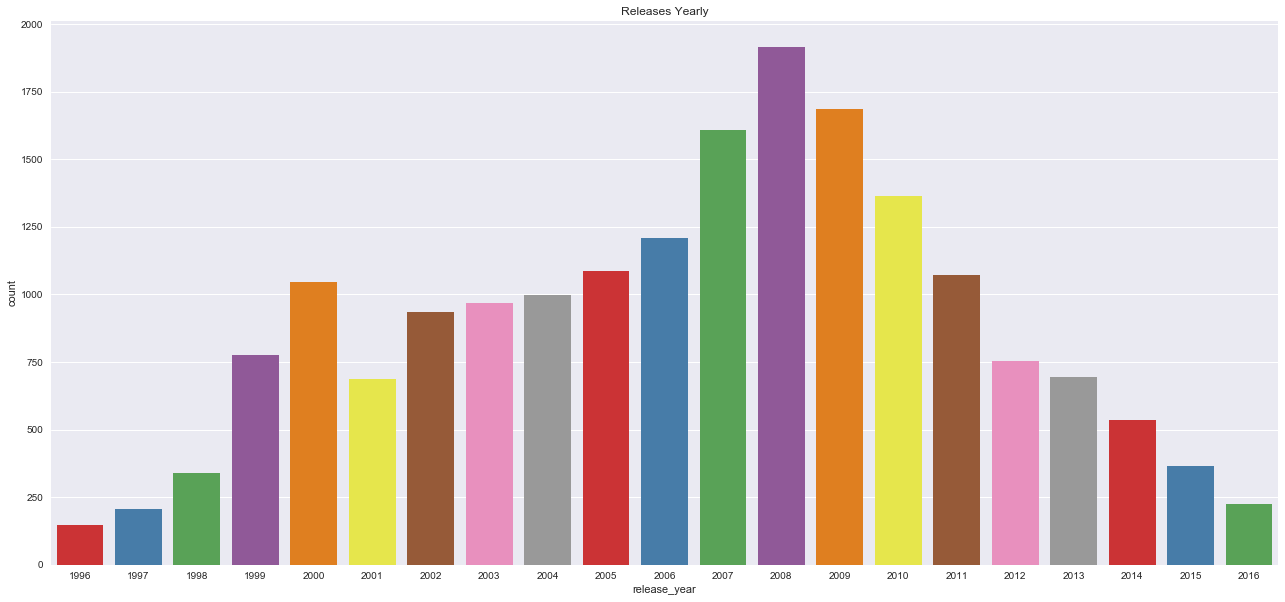

In [11]:
#Releases Based on Years
fig,ax=plt.subplots(figsize=(22,10))
sns.countplot(games['release_year'],palette='Set1').set_title('Releases Yearly')
plt.show()

In [12]:
#most liked platform yearly
games1 = games.groupby('release_year')['platform'].value_counts()
games1

release_year  platform           
1996          PlayStation            138
              Nintendo 64              8
              Saturn                   2
              PC                       1
1997          PlayStation            170
              Nintendo 64             35
1998          PlayStation            155
              PC                     112
              Nintendo 64             72
1999          PC                     243
              PlayStation            177
              Nintendo 64             98
              Game Boy Color          86
              Lynx                    80
              Dreamcast               54
              NeoGeo Pocket Color     17
              Game Boy                16
              Game.Com                 3
              Dreamcast VMU            1
2000          PC                     266
              PlayStation            248
              Game Boy Color         210
              Dreamcast              167
              Nintendo 

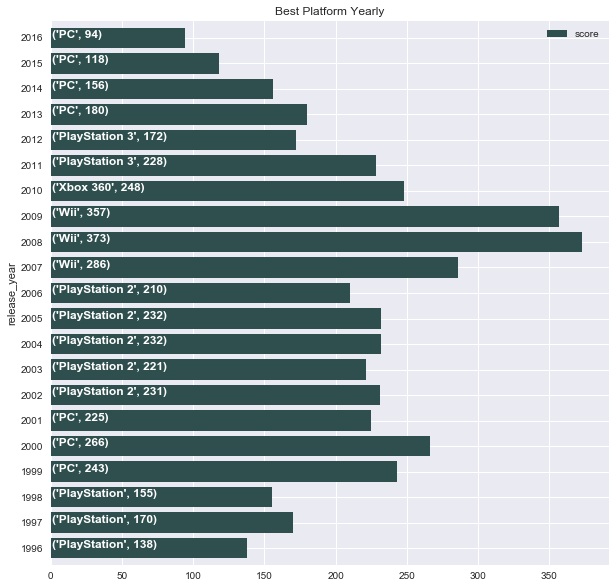

In [15]:
#Plotting Best Platform
yearly=games.groupby(['release_year','platform'])['score'].count().reset_index()#grouping based on release year  and platform
yearly=yearly.sort_values(by='score',ascending=False)
yearly=yearly.drop_duplicates(subset=['release_year'],keep='first')
yearly=yearly.sort_values(by='release_year')
yearly.set_index('release_year',inplace=True)
yearly.plot.barh(color='#2F4F4F',width=0.8).set_title("Best Platform Yearly")
fig=plt.gcf()
fig.set_size_inches(10,10)
for i, p in enumerate(zip(yearly.platform, yearly['score'])):
    plt.text(s=p,x=1,y=i,fontweight='bold',color='white')
plt.show()


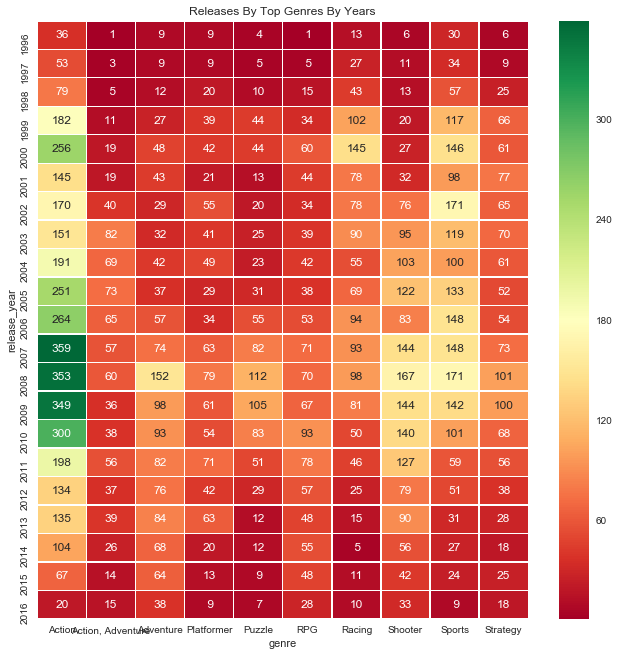

In [14]:
#Releases by top Genere yearly
plt.subplots(figsize=(15,15))
new_genres=max_genres.sort_values(ascending=False)[:10]
top_genres=games[games['genre'].isin(new_genres[:10].index)]
top_genres=top_genres.groupby(['release_year','genre'])['score'].count().reset_index()
top_genres=top_genres.pivot('release_year','genre','score')
sns.heatmap(top_genres,annot=True,fmt='2.0f',cmap='RdYlGn',linewidths=0.4)
fig=plt.gcf()
fig.set_size_inches(11,11)
plt.title('Releases By Top Genres Yearly')
plt.show()

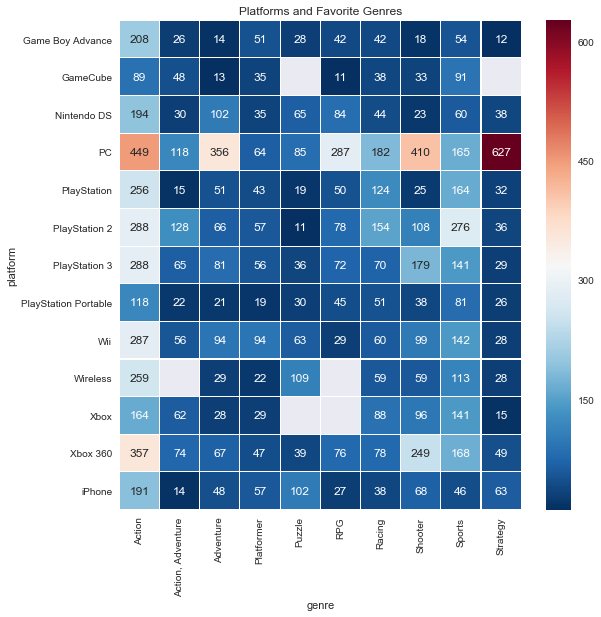

In [15]:
#Top Platform and Genere
plat_genre=games.copy()
plat_genre=plat_genre[plat_genre['genre'].isin(new_genres.index)]
plat_genre=plat_genre.groupby(['platform','genre'])['score'].count().reset_index()
plat_genre=plat_genre[plat_genre['score']>10]
plat_genre=plat_genre.pivot('platform','genre','score')
plat_genre=plat_genre.dropna(thresh=8)
sns.heatmap(plat_genre,annot=True,fmt='2.0f',cmap='RdBu_r',linewidths='0.1')
fig=plt.gcf()
fig.set_size_inches(9,9)
plt.title('Platforms and Favorite Genres')
plt.show()